### Q1.	Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?

Certainly! Here are some applications for each type of RNN architecture:

### Sequence-to-Sequence RNN:
1. **Machine Translation:** Sequence-to-sequence RNNs are commonly used for machine translation tasks, where the input sequence consists of words or characters in one language, and the output sequence consists of words or characters in another language.

2. **Speech Recognition:** Sequence-to-sequence RNNs can be used for speech recognition, where the input sequence is a sequence of audio features (e.g., spectrograms or MFCCs), and the output sequence is a sequence of phonemes or words.

3. **Text Summarization:** Sequence-to-sequence RNNs can generate concise summaries of input texts by learning to compress and paraphrase the original text into a shorter sequence of words or phrases.

4. **Chatbots:** Sequence-to-sequence RNNs are used in chatbots for generating responses to user queries. The input sequence is the user's message, and the output sequence is the chatbot's response.

### Sequence-to-Vector RNN:
1. **Sentiment Analysis:** Sequence-to-vector RNNs can be used for sentiment analysis tasks, where the input sequence is a sequence of words in a sentence, and the output vector represents the sentiment of the input sentence (e.g., positive, negative, or neutral).

2. **Document Classification:** Sequence-to-vector RNNs can classify entire documents into different categories or topics. The input sequence consists of words or sentences in the document, and the output vector represents the predicted category or topic.

3. **Image Captioning:** Sequence-to-vector RNNs can generate textual descriptions of images. The input sequence is a sequence of image features extracted from a convolutional neural network, and the output vector represents the generated caption for the image.

4. **Time Series Forecasting:** Sequence-to-vector RNNs can forecast future values of time series data. The input sequence is a historical sequence of data points, and the output vector represents the predicted future value or values.

### Vector-to-Sequence RNN:
1. **Image Generation:** Vector-to-sequence RNNs can generate images based on a given vector input. The input vector may encode attributes or features of the desired image, and the output sequence represents the pixel values of the generated image.

2. **Music Generation:** Vector-to-sequence RNNs can generate music sequences based on a given vector input representing musical attributes or features. The output sequence consists of musical notes or events that form a complete musical composition.

3. **Video Description:** Vector-to-sequence RNNs can generate textual descriptions of videos. The input vector may encode attributes or features of the video, and the output sequence represents the generated description of the video content.

4. **Speech Synthesis:** Vector-to-sequence RNNs can synthesize speech from given vector inputs. The input vector may encode linguistic features or speech parameters, and the output sequence represents the synthesized speech waveform.

### Q2.	How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?

The inputs and outputs of an RNN layer have specific dimensional requirements, and understanding these dimensions is crucial for effectively using RNNs in various tasks. 

### Inputs of an RNN Layer:

The inputs to an RNN layer are typically sequences of data, such as sequences of words in natural language processing tasks or sequences of time steps in time series forecasting. The dimensions of the inputs to an RNN layer are as follows:

1. **Batch Size (Optional):** This dimension represents the number of sequences or samples processed in each batch. It is usually the first dimension of the input tensor and can be omitted if processing a single sequence.

2. **Time Steps:** This dimension represents the length of each sequence, i.e., the number of time steps or elements in each sequence. It corresponds to the length of the input sequence and varies depending on the specific task.

3. **Features:** This dimension represents the number of features or dimensions in each time step of the sequence. For example, in natural language processing tasks, each time step may represent a word encoded as a vector, while in time series forecasting, each time step may represent a scalar value.

### Outputs of an RNN Layer:

The outputs of an RNN layer also have specific dimensional requirements, which depend on the configuration of the RNN layer (e.g., whether it is a simple RNN, LSTM, or GRU) and the task being performed. The dimensions of the outputs from an RNN layer are as follows:

1. **Batch Size (Optional):** Similar to the inputs, this dimension represents the number of sequences or samples processed in each batch. It is present if the input tensor includes batch dimension.

2. **Time Steps:** The length of each output sequence is usually the same as the length of the input sequence, preserving the temporal relationship between inputs and outputs.

3. **Features:** This dimension represents the number of features or dimensions in each output time step. The interpretation of these features depends on the specific task. For example, in sequence classification tasks, each output time step may represent the probability distribution over different classes.

In summary, the inputs to an RNN layer must have dimensions representing batch size (optional), time steps, and features, while the outputs have similar dimensions representing batch size (optional), time steps, and features. Understanding and correctly managing these dimensions are essential for designing and training RNN architectures effectively.

### Q3.	If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?

When building a deep sequence-to-sequence RNN, the `return_sequences=True` parameter should be set for all intermediate RNN layers but not for the final layer. This configuration ensures that each intermediate RNN layer produces output sequences that can be fed into subsequent layers. The final layer, however, should produce a single output vector, representing the entire sequence's context.

Here's how you would configure the RNN layers in a deep sequence-to-sequence RNN:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(timesteps, features)))  # First layer
model.add(LSTM(units=64, return_sequences=True))  # Intermediate layers
model.add(LSTM(units=64, return_sequences=False))  # Final layer
```

In this example, each LSTM layer (except the last one) is configured to return sequences (`return_sequences=True`), allowing the output of each layer to be fed into the subsequent layer.

For a sequence-to-vector RNN, you typically only need the final RNN layer to have `return_sequences=False` to produce a single output vector representing the entire sequence's context. Intermediate layers can have `return_sequences=True` to process sequences internally, but it's not strictly necessary since the final layer will aggregate their outputs into a single vector.

Here's how you would configure the RNN layers in a sequence-to-vector RNN:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(timesteps, features)))  # First layer
model.add(LSTM(units=64, return_sequences=False))  # Final layer
```

In this configuration, only the final LSTM layer has `return_sequences=False`, indicating that it produces a single output vector rather than a sequence. This output vector captures the context of the entire input sequence.

### Q4.	Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?

For forecasting the next seven days in a daily univariate time series, you should use a Sequence-to-Sequence RNN architecture. Specifically, you would configure the RNN to take in historical data for a window of past days and predict the values for the next seven days. Here's how you can structure the architecture:

1. **Encoder-Decoder Architecture:** You'll need an encoder-decoder architecture, where the encoder processes the historical time series data, and the decoder generates predictions for the future time steps.

2. **Sequence Length:** The input sequence length for the encoder should correspond to the number of days you want to use for prediction. For example, if you're forecasting based on the past 30 days of data, the input sequence length would be 30.

3. **Output Sequence Length:** The output sequence length for the decoder should be set to seven, corresponding to the seven days you want to forecast.

4. **RNN Type:** You can use any type of RNN, such as LSTM or GRU, for both the encoder and decoder. These architectures are well-suited for modeling sequential data and capturing temporal dependencies.

5. **Loss Function:** You should use an appropriate loss function for sequence prediction, such as mean squared error (MSE), to measure the difference between the predicted and actual values across the seven days.

Here's a simplified example of how you could structure the architecture using TensorFlow/Keras:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

# Define input sequence length
input_sequence_length = 30  # for example, use past 30 days

# Define output sequence length
output_sequence_length = 7  # forecast next 7 days

# Define RNN model
model = Sequential([
    LSTM(units=64, input_shape=(input_sequence_length, 1)),
    RepeatVector(output_sequence_length),
    LSTM(units=64, return_sequences=True),
    TimeDistributed(Dense(1))
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Predict next 7 days
predictions = model.predict(X_test)
```

In this example, `X_train` and `y_train` represent the training data, where `X_train` contains input sequences of past data and `y_train` contains corresponding output sequences of future data. The model is trained to predict the next seven days of data based on the past input sequences. Adjust the architecture and hyperparameters as needed based on the specifics of your dataset and task.

### Q5.	What are the main difficulties when training RNNs? How can you handle them?

Training Recurrent Neural Networks (RNNs) can present several challenges due to their inherent nature and architectural complexities. Here are some of the main difficulties encountered when training RNNs and strategies to handle them:

1. **Vanishing and Exploding Gradients:** RNNs suffer from the problem of vanishing and exploding gradients, where gradients either become too small (vanishing) or too large (exploding) as they are backpropagated through time. This can result in slow convergence or instability during training.

   - **Solution:** Use gradient clipping to mitigate exploding gradients by rescaling gradients that exceed a predefined threshold. For vanishing gradients, consider using architectures like Long Short-Term Memory (LSTM) or Gated Recurrent Unit (GRU), which are specifically designed to address this issue by incorporating gating mechanisms.

2. **Long-Term Dependencies:** RNNs struggle to capture long-term dependencies in sequential data due to the vanishing gradient problem. As a result, they may have difficulty remembering information from distant past time steps.

   - **Solution:** Architectures like LSTM and GRU are designed to maintain long-term dependencies by incorporating memory cells and gating mechanisms. Additionally, techniques like skip connections or attention mechanisms can help RNNs attend to relevant information across distant time steps.

3. **Training Speed:** Training RNNs can be computationally intensive, especially for long sequences and complex architectures. Slow training can hinder experimentation and model iteration.

   - **Solution:** Implement techniques to accelerate training, such as batching sequences, using optimized libraries (e.g., TensorFlow, PyTorch), and leveraging hardware accelerators (e.g., GPUs, TPUs). Additionally, consider using techniques like teacher forcing and scheduled sampling to stabilize training and improve convergence speed.

4. **Overfitting:** RNNs are prone to overfitting, especially when training on small datasets or using complex architectures.

   - **Solution:** Employ regularization techniques such as dropout, L2 regularization, or batch normalization to prevent overfitting. Additionally, use techniques like early stopping, cross-validation, and data augmentation to monitor and mitigate overfitting during training.

5. **Data Preprocessing:** Sequential data often requires careful preprocessing and feature engineering to be effectively used as input to RNNs. Preprocessing steps such as normalization, scaling, and encoding categorical variables can impact model performance.

   - **Solution:** Perform thorough data preprocessing and exploratory data analysis to understand the characteristics of the data and identify preprocessing steps that are appropriate for the task. Use techniques like one-hot encoding or word embeddings to represent categorical or textual data in a format suitable for input to RNNs.

By addressing these challenges and implementing appropriate strategies, it's possible to train RNNs effectively and leverage their strengths in modeling sequential data for a wide range of tasks, including natural language processing, time series forecasting, and sequence generation.

### Q6.	Can you sketch the LSTM cell’s architecture?

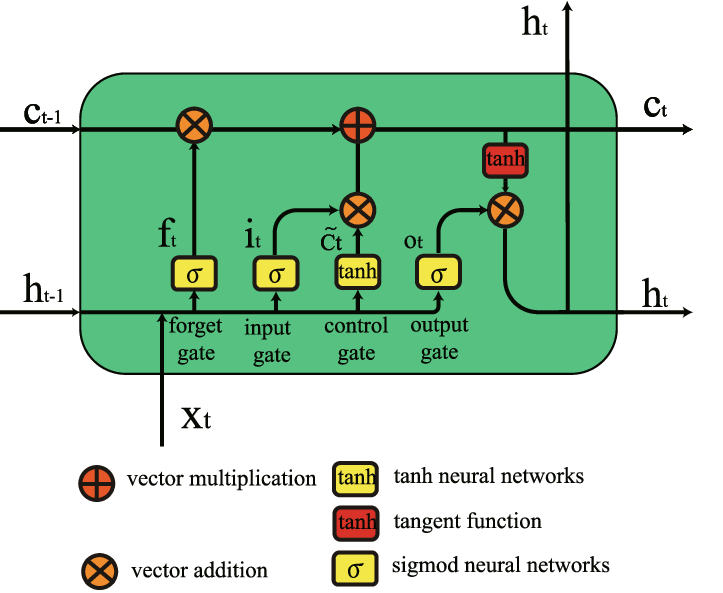

### Q7.	Why would you want to use 1D convolutional layers in an RNN?

Using 1D convolutional layers in conjunction with recurrent neural networks (RNNs) can offer several benefits in certain scenarios:

1. **Capture Local Patterns:** 1D convolutional layers excel at capturing local patterns in sequential data. By applying filters across different segments of the input sequence, they can detect patterns that may be relevant to the task at hand, such as short-term dependencies or local variations.

2. **Reduce Computational Complexity:** While RNNs are powerful for modeling sequential data, they can be computationally expensive, especially for long sequences. 1D convolutional layers can help reduce the computational complexity by extracting relevant features from the input sequence before passing them to the RNN. This can lead to faster training and inference times.

3. **Learn Hierarchical Features:** By stacking multiple 1D convolutional layers, the network can learn hierarchical representations of the input sequence, capturing both local and global patterns. These learned features can provide valuable information to the subsequent RNN layers, enabling the network to better understand the underlying structure of the sequential data.

4. **Handle Variable-Length Sequences:** RNNs traditionally require fixed-length input sequences, which can be problematic when dealing with variable-length sequences. 1D convolutional layers can help address this issue by providing a mechanism to extract fixed-length feature representations from variable-length inputs, making it easier to integrate RNNs into architectures that handle sequences of different lengths.

5. **Regularization:** Incorporating 1D convolutional layers alongside RNNs can act as a form of regularization, helping prevent overfitting by imposing spatial constraints on the learned representations. This can improve the generalization ability of the model and enhance its performance on unseen data.

Overall, using 1D convolutional layers in RNN architectures can complement the strengths of both architectures and lead to more effective models for tasks involving sequential data, such as natural language processing, time series analysis, and speech recognition.

### Q8.	Which neural network architecture could you use to classify videos?

To classify videos, you would typically use a convolutional neural network (CNN) architecture combined with recurrent neural networks (RNNs) or temporal convolutional networks (TCNs) to capture spatial and temporal features in the video data. Here are two common architectures used for video classification:

1. **3D Convolutional Neural Networks (3D CNNs):**
   - 3D CNNs are an extension of traditional 2D CNNs, designed to capture spatial and temporal features directly from video data.
   - They operate on 3D volumes of data (width, height, time), allowing them to learn spatiotemporal patterns in video sequences.
   - 3D CNNs typically consist of multiple 3D convolutional layers followed by pooling layers and fully connected layers for classification.
   - Popular architectures like C3D (Convolutional 3D) and I3D (Inflated 3D) are based on 3D CNNs and have been successfully used for video classification tasks.

2. **CNN + RNN or TCN:**
   - Another approach for video classification is to combine a CNN with an RNN or a TCN to capture both spatial and temporal features.
   - The CNN is used to extract spatial features from individual frames of the video, while the RNN or TCN processes these features over time to capture temporal dynamics.
   - In this architecture, the CNN typically serves as a feature extractor, and the RNN or TCN serves as a sequence model for capturing temporal dependencies.
   - This hybrid architecture can be more flexible and powerful than using 3D CNNs alone, as it allows for more sophisticated modeling of both spatial and temporal aspects of the video data.

Both 3D CNNs and CNN + RNN/TCN architectures have been widely used for various video classification tasks, including action recognition, video summarization, and scene classification. The choice between these architectures depends on factors such as the complexity of the task, the size of the dataset, and the computational resources available.

### Q9.	Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load SketchRNN dataset
dataset_name = "sketch_rnn/quickdraw"
(ds_train, ds_test), ds_info = tfds.load(
    name=dataset_name,
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Define preprocessing functions
def preprocess_fn(features, label):
    # Normalize and resize images
    features = tf.image.convert_image_dtype(features, tf.float32)
    features = tf.image.resize(features, (28, 28))
    return features, label

# Apply preprocessing
ds_train = ds_train.map(preprocess_fn)
ds_test = ds_test.map(preprocess_fn)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(ds_train.batch(128), epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(ds_test.batch(128))
print("Test Accuracy:", test_accuracy)